<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0826/blob/main/transfer_%E4%B8%8A%E8%AA%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import zipfile
path = "/content/drive/MyDrive/train.zip"
f = zipfile.ZipFile(path)
f.extractall()

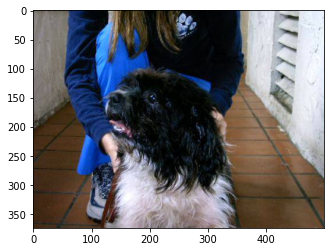

In [60]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
fs = glob.glob("train/*")
plt.imshow(Image.open(fs[2000]))

In [61]:
import random
import pandas as pd
dogs = glob.glob("train/dog.*")
random.shuffle(dogs)
cats = glob.glob("train/cat.*")
random.shuffle(cats)
train = pd.DataFrame({
    "path":dogs[:900] + cats[:900],
    "target":[0] * 900 + [1] * 900
})
validate = pd.DataFrame({
    "path":dogs[900:950] + cats[900:950],
    "target":[0] * 50 + [1] * 50
})
test = pd.DataFrame({
    "path":dogs[950:1000] + cats[950:1000],
    "target":[0] * 50 + [1] * 50
})

In [62]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization
for l in vgg.layers:
    l.trainable = False
layers = [
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
layers = vgg.layers + layers
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [64]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [65]:
import numpy as np

In [66]:
(np.array([[1, 2], [3, 4]]) + np.array([[5, 6], [7, 8]])) * 0.5

array([[3., 4.],
       [5., 6.]])

In [67]:
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
fs = glob.glob("train/*")
target = fs[20]

# 預處理(要照你偷來的模型做)
from tensorflow.keras.applications.vgg16 import preprocess_input
img = Image.open(target).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img))
print(img_np)

[[[-48.939003   11.221001   -3.6800003]
  [-63.939003   -4.7789993 -17.68     ]
  [-36.939003   18.221       6.3199997]
  ...
  [-48.939003  -15.778999   -0.6800003]
  [-60.939003  -26.779     -11.68     ]
  [-54.939003  -18.779      -3.6800003]]

 [[-55.939003    5.2210007  -8.68     ]
  [-73.939     -14.778999  -27.68     ]
  [-86.939     -28.779     -42.68     ]
  ...
  [-49.939003  -17.779      -5.6800003]
  [-58.939003  -27.779     -15.68     ]
  [-40.939003   -7.7789993   5.3199997]]

 [[-46.939003   14.221001    1.3199997]
  [-49.939003    9.221001   -3.6800003]
  [-57.939003   -0.7789993 -11.68     ]
  ...
  [-22.939003    8.221001   15.32     ]
  [  1.060997   32.221      39.32     ]
  [ 20.060997   51.221      58.32     ]]

 ...

 [[-19.939003   50.221      21.32     ]
  [-81.939     -11.778999  -40.68     ]
  [-88.939     -20.779     -47.68     ]
  ...
  [  2.060997   40.221      25.32     ]
  [-14.939003   23.221       8.32     ]
  [-36.939003    1.2210007 -13.68     ]]

 [

In [56]:
# 不用fit: fit_generator/自己寫
def xx():
  for i in range(10):
    yield "{}-{}".format(1, i) 

for y in xx():
  print(y)

1-0
1-1
1-2
1-3
1-4
1-5
1-6
1-7
1-8
1-9


In [68]:
# 自己寫training/validate
import numpy as np
x_train = np.array(train["path"])
y_train = np.array(train["target"])
x_validate = np.array(validate["path"])
y_validate = np.array(validate["target"])
x_test = np.array(test["path"])
y_test = np.array(test["target"])

In [69]:
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
def get_data(x, y, batch=None):
    # 如果不是None, 那代表是數字(20), 隨機20個idx
    # 如果是None, 那就沒有隨機, 拿全部
    if batch is not None:
        idx = np.random.randint(0, len(x), size=batch)
        x, y = x[idx], y[idx]
    # img_pre: preprocess過後的圖片
    # img_ori: 沒有preprocess的圖片
    img_pre, img_ori = [], []
    # 走過我的每一個path
    for p in x:
        # 讀取圖片並且預處理
        img = Image.open(p).convert("RGB").resize((224, 224))
        img = np.array(img)
        img_pre.append(preprocess_input(img))
        img_ori.append(img)
    # 回傳(預處理過後圖片, 沒處理圖片, 答案)
    return (np.array(img_pre), np.array(img_ori), y)
# 使用範例
x, x_ori, y = get_data(x_train, y_train, 10)
print(x.shape)
print(x_ori.shape)
print(y.shape)
# print(x)

(10, 224, 224, 3)
(10, 224, 224, 3)
(10,)


In [70]:
# validate和test全部讀出來
xv, xv_ori, yv = get_data(x_validate, y_validate)
xt, xt_ori, yt = get_data(x_test, y_test)
print(xv.shape)
print(xt.shape)

(100, 224, 224, 3)
(100, 224, 224, 3)


In [71]:
# 我沒有使用fit: 因為使用fit你一定要把全部圖都讀好(現實世界不太可能)
# 真的自己一步一步來: train_on_batch, test_on_batch
for i in range(50):
    x, _, y = get_data(x_train, y_train, batch=20)
    result = model.train_on_batch(x, y)
    print("train:", result)
    result = model.test_on_batch(xv, yv)
    print("validate:", result)
    print("-" * 15, i, "end", "-" * 15)

train: [0.7313416004180908, 0.44999998807907104]
validate: [0.9429986476898193, 0.7099999785423279]
--------------- 0 end ---------------
train: [0.5824615955352783, 0.6000000238418579]
validate: [0.817534327507019, 0.6800000071525574]
--------------- 1 end ---------------
train: [0.6577222347259521, 0.6000000238418579]
validate: [0.7015774250030518, 0.6899999976158142]
--------------- 2 end ---------------
train: [0.6802741289138794, 0.6000000238418579]
validate: [0.6919950246810913, 0.699999988079071]
--------------- 3 end ---------------
train: [0.6409780979156494, 0.6499999761581421]
validate: [0.6552801728248596, 0.7099999785423279]
--------------- 4 end ---------------
train: [0.6983962059020996, 0.550000011920929]
validate: [0.6123019456863403, 0.7300000190734863]
--------------- 5 end ---------------
train: [0.5618528723716736, 0.8500000238418579]
validate: [0.5688545107841492, 0.75]
--------------- 6 end ---------------
train: [0.488939106464386, 0.800000011920929]
validate: [

In [ ]:
model.predict(x)

array([[0.04552266, 0.9544773 ],
       [0.03077627, 0.96922374],
       [0.97444624, 0.02555383],
       [0.01037704, 0.98962295],
       [0.0301684 , 0.9698316 ],
       [0.99086446, 0.00913556],
       [0.6513852 , 0.3486148 ],
       [0.96386933, 0.03613061],
       [0.9984674 , 0.00153261],
       [0.49047583, 0.50952417],
       [0.9350147 , 0.06498523],
       [0.29619995, 0.7038001 ],
       [0.08417953, 0.9158205 ],
       [0.35211915, 0.64788085],
       [0.99729806, 0.00270197],
       [0.9953412 , 0.00465879],
       [0.03626693, 0.963733  ],
       [0.6879824 , 0.31201756],
       [0.90011615, 0.09988387],
       [0.31408995, 0.68591   ]], dtype=float32)

In [72]:
pre = model.predict(xt).argmax(axis=1)
model.evaluate(xt, yt)

4/4 [==============================] - 1s 98ms/step - loss: 0.1139 - accuracy: 0.9700


[0.11385870724916458, 0.9700000286102295]

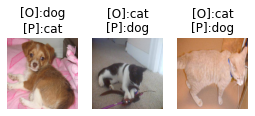

In [73]:
import numpy as np
# 找出True(預測錯誤)的位置
idx = np.nonzero(pre != yt)[0]
idx = idx[:200]
pre_false_label = yt[idx]
pre_false_pre = pre[idx]
pre_false_img = xt_ori[idx]
# !
trans = ["dog", "cat"]
plt.figure(figsize=(15, 5))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_label[i]], trans[pre_false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

url:http://n.sinaimg.cn/sinakd10113/73/w500h373/20200503/fbf8-isyparh4669713.jpg
dog 的機率: 0.744
cat 的機率: 0.256


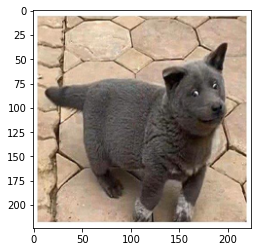

In [ ]:
import requests
# pillow
from PIL import Image
url = input("url:")
response = requests.get(url, stream=True)
img = Image.open(response.raw).convert("RGB").resize((224, 224))
img_np = np.array(img).reshape(1, 224, 224, 3)
# (32, 32, 3) -> (1, 32, 32, 3)
img_np_pre = preprocess_input(img_np)
proba = model.predict(img_np_pre)[0]
for p, n in zip(proba, trans):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)